**Data Source**: 

[Google Play Store Apps](https://github.com/gauthamp10/Google-Playstore-Dataset) by Gauthan Prakash, containing 1.1 million applications with 23 attributes (collected in December 2020).

**Noebook description**: 

Short exercise to practice classification in Python, identifying the important variables that can predict if a Play Store game will achieve a rating score of 4.5 and above.

The data used for modeling in this notebook was cleaned and prepared at the EDA stage (R Studio), containing observations (apps) that have : 
* a game category according to [Google Play](https://support.google.com/googleplay/android-developer/answer/9859673?hl=en)  
* at least one update in 2020
* release year indicated
* a rating score 
* rating count above 500


**Notebook contents**:  
* Preprocessing
* Feature selection
* Classification
    * Decision tree (with grid search)
    * Random forest (with randomized search) 
    * Gradient boosted trees (with grid search)


In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
filepath1 = "/Data/games1.csv"
data = pd.read_csv(filepath1)
data.head()

,app_id,category,rating,rating_count,minimum_installs,maximum_installs,free,price,size,content_rating,ad_supported,in_app_purchases,last_updated_year,release_year,age,age_update
0,com.skizze.wwii,Strategy,4.3,17297,1000000.0,2161778.0,1,0.0,86.0,Everyone 10+,1,1,2020,2018,866,7
1,com.sinyee.babybus.village,Educational,4.0,44700,10000000.0,29969311.0,1,0.0,90.0,Everyone,1,1,2020,2018,838,64
2,com.sinyee.babybus.dentistII,Educational,4.1,10990,10000000.0,12520805.0,1,0.0,87.0,Everyone,1,1,2020,2020,219,64
3,soccer.tutor.reader,Sports,4.4,505,50000.0,66814.0,1,0.0,16.0,Everyone,0,0,2020,2013,2648,113
4,com.muzudre.Workout,Sports,4.8,2217,100000.0,226434.0,1,0.0,9.3,Everyone,0,0,2020,2017,1157,196


In [13]:
data.shape

(22591, 16)

In [14]:
data.dtypes

app_id                object
category              object
rating               float64
rating_count           int64
minimum_installs     float64
maximum_installs     float64
free                   int64
price                float64
size                 float64
content_rating        object
ad_supported           int64
in_app_purchases       int64
last_updated_year      int64
release_year           int64
age                    int64
age_update             int64
dtype: object

### Labels

In [29]:
#label
data['label'] = np.where(data['rating'] >= 4.5, 1, 0)
data.groupby('label').size()


label
0    18367
1     4224
dtype: int64

In [10]:
data.label.value_counts(normalize=True)

0    0.813023
1    0.186977
Name: label, dtype: float64

In [11]:
data.describe()

,rating,rating_count,maximum_installs,free,price,size,ad_supported,in_app_purchases,last_updated_year,release_year,age,age_update,label
count,22591.000000,2.259100e+04,2.259100e+04,22591.000000,22591.000000,22591.000000,22591.00000,22591.000000,22591.0,22591.000000,22591.000000,22591.000000,22591.000000
mean,4.086654,7.566228e+04,5.037103e+06,0.975344,0.097399,51.813952,0.88159,0.650170,2020.0,2017.330973,1125.477845,102.381081,0.186977
std,0.424696,8.112437e+05,2.533491e+07,0.155077,0.908444,40.844262,0.32310,0.476927,0.0,2.282605,827.098766,89.914069,0.389902
min,1.200000,5.010000e+02,5.039000e+03,0.000000,0.000000,1.000000,0.00000,0.000000,2020.0,2010.000000,3.000000,0.000000,0.000000
25%,3.900000,1.403000e+03,2.170965e+05,1.000000,0.000000,26.000000,1.00000,0.000000,2020.0,2016.000000,442.000000,26.000000,0.000000
50%,4.100000,4.567000e+03,6.884250e+05,1.000000,0.000000,45.000000,1.00000,1.000000,2020.0,2018.000000,958.000000,75.000000,0.000000
75%,4.400000,2.104900e+04,2.692048e+06,1.000000,0.000000,71.000000,1.00000,1.000000,2020.0,2019.000000,1625.000000,154.000000,0.000000
max,5.000000,6.850709e+07,1.597811e+09,1.000000,49.990000,971.000000,1.00000,1.000000,2020.0,2020.000000,3959.000000,336.000000,1.000000


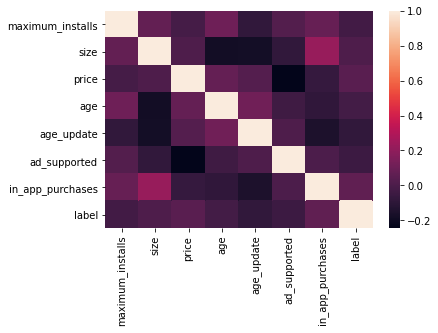

In [32]:
numeric_variables = ['maximum_installs','size','price','age','age_update','ad_supported','in_app_purchases','label']
numeric_variables = data.groupby('app_id')[numeric_variables].max().reset_index()
numeric_variables.shape
sns.heatmap(numeric_variables.corr())

In [33]:
round(numeric_variables.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
maximum_installs,22591.0,5037102.634,2.533491e+07,5039.0,217096.5,688425.0,2692048.0,1.597811e+09
size,22591.0,51.814,4.084400e+01,1.0,26.0,45.0,71.0,9.710000e+02
price,22591.0,0.097,9.080000e-01,0.0,0.0,0.0,0.0,4.999000e+01
age,22591.0,1125.478,8.270990e+02,3.0,442.0,958.0,1625.0,3.959000e+03
age_update,22591.0,102.381,8.991400e+01,0.0,26.0,75.0,154.0,3.360000e+02
ad_supported,22591.0,0.882,3.230000e-01,0.0,1.0,1.0,1.0,1.000000e+00
in_app_purchases,22591.0,0.650,4.770000e-01,0.0,0.0,1.0,1.0,1.000000e+00
label,22591.0,0.187,3.900000e-01,0.0,0.0,0.0,0.0,1.000000e+00


In [34]:
categorical_variables = ['category','content_rating']
categorical_variables = data.groupby('app_id')[categorical_variables].max().reset_index()
categorical_variables.shape

(22591, 3)

### Preprocessing

In [35]:
dummy_df = pd.get_dummies(categorical_variables, 
    columns=['category', 'content_rating'], drop_first = False)
dummy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
category_Action,22591.0,0.086495,0.281099,0.0,0.0,0.0,0.0,1.0
category_Adventure,22591.0,0.066088,0.248442,0.0,0.0,0.0,0.0,1.0
category_Arcade,22591.0,0.065114,0.246733,0.0,0.0,0.0,0.0,1.0
category_Board,22591.0,0.036962,0.188672,0.0,0.0,0.0,0.0,1.0
category_Casino,22591.0,0.022088,0.146974,0.0,0.0,0.0,0.0,1.0
category_Casual,22591.0,0.113585,0.317314,0.0,0.0,0.0,0.0,1.0
category_Educational,22591.0,0.052145,0.222324,0.0,0.0,0.0,0.0,1.0
category_Music,22591.0,0.010624,0.102525,0.0,0.0,0.0,0.0,1.0
category_Puzzle,22591.0,0.112877,0.316449,0.0,0.0,0.0,0.0,1.0
category_Racing,22591.0,0.034527,0.182583,0.0,0.0,0.0,0.0,1.0


In [36]:
#merge categorical and numeric variables
transformed_df = pd.merge(numeric_variables, dummy_df, on='app_id')
transformed_df.shape

(22591, 30)

In [37]:
#scale 
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

num_vars = list(set(transformed_df.columns)- set(dummy_df))
for column in [num_vars]:
    transformed_df[column] = mm.fit_transform(transformed_df[column])

In [38]:
round(transformed_df.describe(), 3)

,maximum_installs,size,price,age,age_update,ad_supported,in_app_purchases,label,category_Action,category_Adventure,...,category_Simulation,category_Sports,category_Strategy,category_Trivia,category_Word,content_rating_Adults only 18+,content_rating_Everyone,content_rating_Everyone 10+,content_rating_Mature 17+,content_rating_Teen
count,22591.000,22591.000,22591.000,22591.000,22591.000,22591.000,22591.000,22591.000,22591.000,22591.000,...,22591.000,22591.000,22591.000,22591.000,22591.000,22591.000,22591.000,22591.000,22591.00,22591.000
mean,0.003,0.052,0.002,0.284,0.305,0.882,0.650,0.187,0.086,0.066,...,0.134,0.093,0.042,0.022,0.033,0.000,0.652,0.093,0.03,0.225
std,0.016,0.042,0.018,0.209,0.268,0.323,0.477,0.390,0.281,0.248,...,0.341,0.290,0.200,0.145,0.179,0.018,0.476,0.290,0.17,0.418
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
25%,0.000,0.026,0.000,0.111,0.077,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
50%,0.000,0.045,0.000,0.241,0.223,1.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.00,0.000
75%,0.002,0.072,0.000,0.410,0.458,1.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.00,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000


### Feature selection

In [39]:
features = transformed_df[transformed_df.columns.difference(['label','app_id'])]

labels = transformed_df['label']

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features,labels)
preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

1.0


In [41]:
VI = pd.DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)[0:20]

,index,RF
25,maximum_installs,0.224453
1,age,0.211101
27,size,0.186917
2,age_update,0.183209
24,in_app_purchases,0.017711
11,category_Puzzle,0.016842
18,category_Word,0.016000
0,ad_supported,0.013829
20,content_rating_Everyone,0.011557
7,category_Casino,0.011428


In [42]:
transformed_df.corr()['label'].sort_values(ascending=False)

label                             1.000000
category_Puzzle                   0.124570
category_Word                     0.122511
category_Casino                   0.101734
in_app_purchases                  0.065151
price                             0.043304
category_Board                    0.041446
category_Sports                   0.035567
content_rating_Everyone           0.022037
category_Trivia                   0.013085
size                              0.011934
content_rating_Adults only 18+    0.004458
category_Adventure                0.000385
content_rating_Teen              -0.001179
category_Music                   -0.013150
category_Role Playing            -0.018086
content_rating_Everyone 10+      -0.019644
age                              -0.021542
content_rating_Mature 17+        -0.025828
maximum_installs                 -0.026297
category_Casual                  -0.028904
category_Strategy                -0.029132
category_Educational             -0.039454
category_Ar

### Partition data

In [43]:

features = transformed_df[transformed_df.columns.difference(['label','app_id'])]
labels = transformed_df['label']
Selected_Features = ['maximum_installs', 'size', 'price', 'age', 'age_update', 'ad_supported', 'in_app_purchases', 'category_Action', 'category_Adventure', 'category_Arcade', 'category_Board', 'category_Casino', 'category_Casual', 'category_Educational', 'category_Music', 'category_Puzzle', 'category_Racing', 'category_Role Playing', 'category_Simulation', 'category_Sports', 'category_Strategy', 'category_Trivia', 'category_Word', 'content_rating_Adults only 18+', 'content_rating_Everyone', 'content_rating_Everyone 10+', 'content_rating_Mature 17+', 'content_rating_Teen']

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(transformed_df[Selected_Features], transformed_df.label))

In [45]:
#create dataframes
X_train = transformed_df.loc[train_idx, Selected_Features]
y_train = transformed_df.loc[train_idx, 'label']

X_test  = transformed_df.loc[test_idx, Selected_Features]
y_test  = transformed_df.loc[test_idx, 'label']

### Decision tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

#DT with no set limits on on maximum depth, features, or leaves
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [47]:
#function to return error metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [48]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.737238
precision,1.0,0.312135
recall,1.0,0.337017
f1,1.0,0.324099


#### Grid search

In [49]:
# Using grid search with cross validation 
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [50]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(149, 7)

In [51]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [52]:
train_test_gr_error

,train,test
accuracy,0.819832,0.811154
precision,0.635678,0.463277
recall,0.085560,0.064720
f1,0.150820,0.113573


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, roc_auc_score

print(classification_report(y_test_pred_gr, y_test))

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_test_pred_gr),
                         'precision': precision_score(y_test, y_test_pred_gr),
                         'recall': recall_score(y_test, y_test_pred_gr),
                         'f1': f1_score(y_test, y_test_pred_gr),
                         'auc': roc_auc_score(y_test, y_test_pred_gr)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      6601
         1.0       0.06      0.46      0.11       177

    accuracy                           0.81      6778
   macro avg       0.52      0.64      0.50      6778
weighted avg       0.96      0.81      0.87      6778

   accuracy  precision   recall        f1       auc
0  0.811154   0.463277  0.06472  0.113573  0.523741


### Random forest

In [55]:
#suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.197243
20.0,0.193322
30.0,0.187947
40.0,0.183899
50.0,0.182887
100.0,0.180042
150.0,0.176500
200.0,0.177575
300.0,0.175489


In [57]:
# Random forest with 150 estimators
model = RF.set_params(n_estimators=300)

y_pred = model.predict(X_test)

In [58]:
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      5511
         1.0       0.58      0.20      0.30      1267

    accuracy                           0.82      6778
   macro avg       0.71      0.58      0.60      6778
weighted avg       0.79      0.82      0.79      6778

   accuracy  precision    recall        f1       auc
0  0.823547   0.580135  0.202841  0.300585  0.584545


#### Randomized search

In [59]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [60]:
# base model to tune
rf = RandomForestClassifier()
# random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 42.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [62]:
y_pred_rs = rf_random.predict(X_test)
score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_rs),
                         'precision': precision_score(y_test, y_pred_rs),
                         'recall': recall_score(y_test, y_pred_rs),
                         'f1': f1_score(y_test, y_pred_rs),
                         'auc': roc_auc_score(y_test, y_pred_rs)},
                         index=pd.Index([0]))

print(score_df)

   accuracy  precision    recall        f1       auc
0  0.822957   0.607717  0.149171  0.239544  0.563517


### Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

error_list = list()

# Iterate through various possibilities for number of trees
tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(max_features=5, n_estimators=n_trees, random_state=42) #5 to reduce processing time

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    # Get the error
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


,error
n_trees,
15.0,0.186338
25.0,0.186191
50.0,0.185748
100.0,0.182945
200.0,0.182355
400.0,0.181912


#### Grid search

In [66]:
# Using grid search with cross validation 
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4, 5]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [67]:
# Get the best model
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=2, n_estimators=400, random_state=42)

In [68]:
y_pred = GV_GBC.predict(X_test)
print(classification_report(y_pred, y_test))

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90      6468
         1.0       0.14      0.57      0.22       310

    accuracy                           0.82      6778
   macro avg       0.56      0.70      0.56      6778
weighted avg       0.94      0.82      0.87      6778

   accuracy  precision    recall        f1       auc
0  0.819268   0.567742  0.138911  0.223209  0.557298


### Visualization

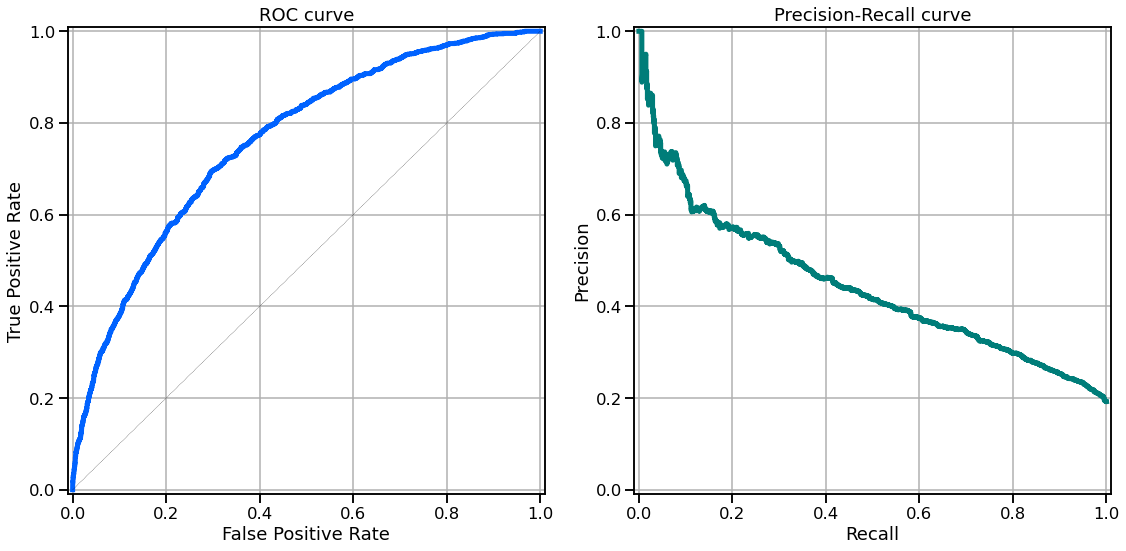

In [70]:
import seaborn as sns
colorlist = {"Magenta 100":"2A0A16", "Magenta 90":"57002B", "Magenta 80":"760A3A", "Magenta 70":"A11950", "Magenta 60":"D12765", "Magenta 50":"EE538B", "Magenta 40":"FA75A6", "Magenta 30":"FFA0C2", "Magenta 20":"FFCFE1", "Magenta 10":"FFF0F6", "Purple 100":"1E1033", "Purple 90":"38146B", "Purple 80":"4F2196", "Purple 70":"6E32C9", "Purple 60":"8A3FFC", "Purple 50":"A66EFA", "Purple 40":"BB8EFF", "Purple 30":"D0B0FF", "Purple 20":"E6D6FF", "Purple 10":"F7F1FF", "Blue 100":"051243", "Blue 90":"061F80", "Blue 80":"0530AD", "Blue 70":"054ADA", "Blue 60":"0062FF", "Blue 50":"408BFC", "Blue 40":"6EA6FF", "Blue 30":"97C1FF", "Blue 20":"C9DEFF", "Blue 10":"EDF4FF", "Teal 100":"081A1C", "Teal 90":"003137", "Teal 80":"004548", "Teal 70":"006161", "Teal 60":"007D79", "Teal 50":"009C98", "Teal 40":"00BAB6", "Teal 30":"20D5D2", "Teal 20":"92EEEE", "Teal 10":"DBFBFB", "Gray 100":"171717", "Gray 90":"282828", "Gray 80":"3D3D3D", "Gray 70":"565656", "Gray 60":"6F6F6F", "Gray 50":"8C8C8C", "Gray 40":"A4A4A4", "Gray 30":"BEBEBE", "Gray 20":"DCDCDC", "Gray 10":"F3F3F3"} 
colors = []
colornum = 60
for i in [f'Blue {colornum}', f'Teal {colornum}', f'Magenta {colornum}', f'Purple {colornum}', f'Gray {colornum}']:
    colors.append(f'#{colorlist[i]}')
palette = sns.color_palette(colors)

from sklearn.metrics import roc_curve, precision_recall_curve

sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = rf_random.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

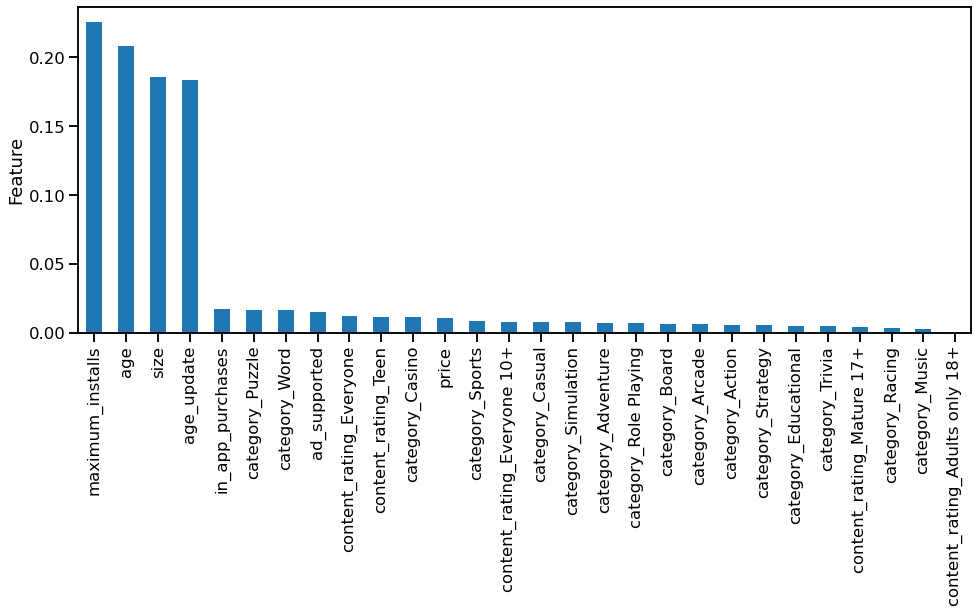

In [76]:
feature_imp = pd.Series(model.feature_importances_, index=Selected_Features).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');